In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU

In [4]:
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (3).zip")
print(df.head())

        Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001


In [5]:
# Using the 'Close' column for prediction
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the dataset for RNN
sequence_length = 60  # We use the last 60 days to predict the next day
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape X for the RNN (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [18]:
model = Sequential()

# Add GRU layers
model.add(GRU(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(GRU(units=50, return_sequences=False))

# Output layer to predict the 'Close' price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU-based RNN
model.fit(X, y, epochs=20, batch_size=32)


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1046
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 7.5628e-04
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.2553e-04
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.8197e-04
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 4.9036e-04
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 4.8562e-04
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.5024e-04
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.9071e-04
Epoch 9/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.3422e-04
Epoch 10/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.9094e-04
Epoch 11/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 3.7159e-04
Epoch 12/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 3.5035e-04
Epoch 13/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.5113e-04
Epoch 14/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.5441e-04
Epoch 15/20
51/51 ━

In [19]:
# Predicting the next day's stock price
predicted_stock_price = model.predict(X)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)  # Convert back to original scale

# Evaluate the model
loss = model.evaluate(X, y)
print(f"Model Loss: {loss}")


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9025e-04
Model Loss: 0.0004162024415563792


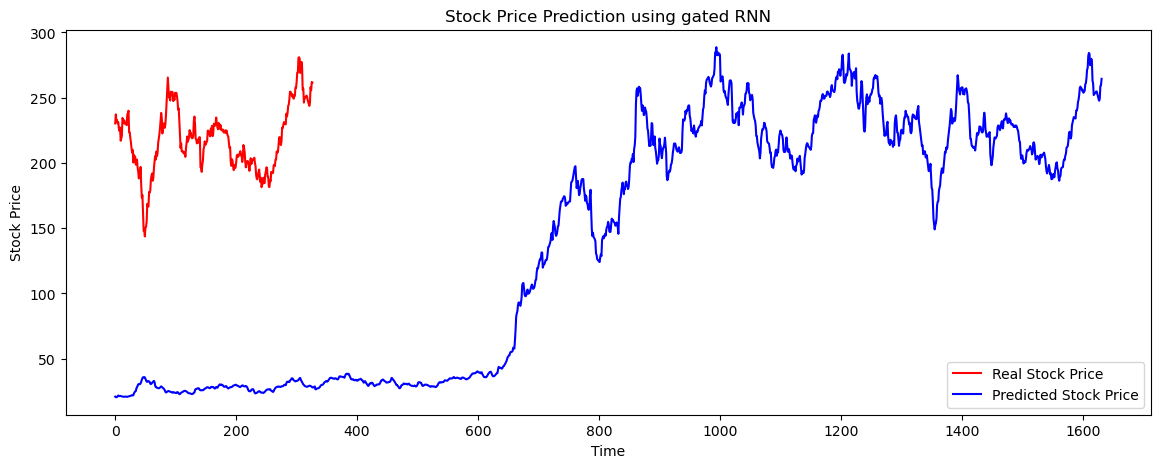

In [21]:
# Plot the results
plt.figure(figsize=(14,5))
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction using gated RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (3).zip")

# Sort by date to ensure chronological order
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Selecting the important features for the RNN
data = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]

# Handle missing values (if any)
data = data.fillna(method='ffill')

# Scale all the data for input to the model
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences for the RNN
sequence_length = 30  # Use past 30 days to predict the next day
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i, 3])  # 3rd index is 'Close' price

X, y = np.array(X), np.array(y)

# New scaler specifically for the Close price
scaler_close = MinMaxScaler()
close_price = data[['Close']].values
scaled_close_price = scaler_close.fit_transform(close_price)

C:\Users\HP\AppData\Local\Temp\ipykernel_3440\2988043726.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [29]:


# Build the RNN model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50, return_sequences=False))

# Output layer to predict the 'Close' price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN
model.fit(X, y, epochs=20, batch_size=32)


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0355
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0018
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0016
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0013
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0013
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0013
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0012
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0012
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 9.8556e-04
Epoch 10/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 7.7769e-04
Epoch 11/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 8.9427e-04
Epoch 12/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 8.8056e-04
Epoch 13/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 6.7259e-04
Epoch 14/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 8.5249e-04
Epoch 15/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms

In [33]:

predicted_price = model.predict(X)

# Inverse transform the predicted close prices
predicted_price = scaler_close.inverse_transform(predicted_stock_price)  # Convert back to original scale

# Evaluate the model (optional)
loss = model.evaluate(X, y)
print(f"Model Loss: {loss}")


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4300e-04
Model Loss: 0.000778580957558006


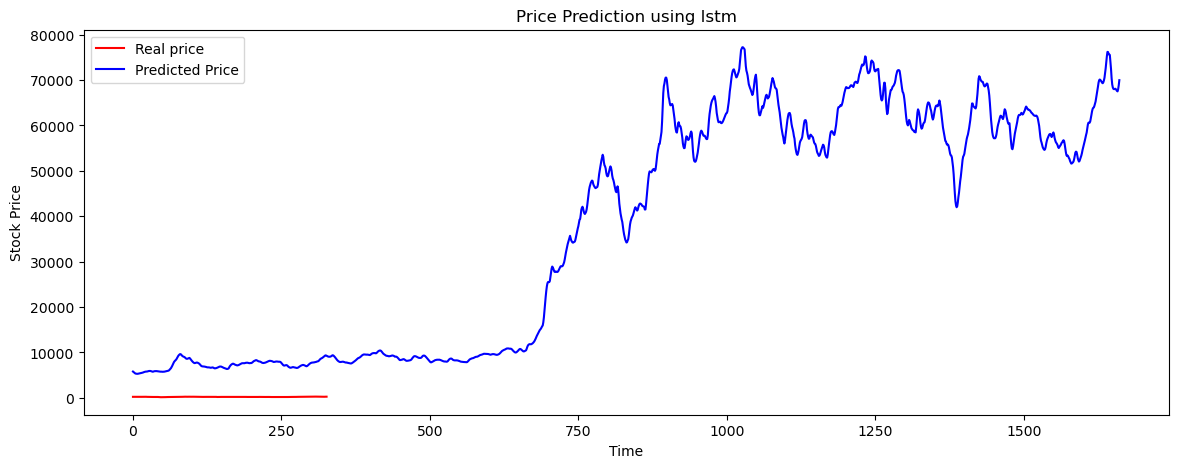

In [34]:
plt.figure(figsize=(14,5))
plt.plot(real_stock_price, color='red', label='Real price')
plt.plot(predicted_price, color='blue', label='Predicted Price')
plt.title('Price Prediction using lstm')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
